# Notebook 2 - Education and Salary - a first overview.

This notebook contains some experimental analysis we performed in the first steps of our research. It contains the first API query showing the point where we started: basically just the education institutions in the county.

**PLEASE NOTE** In this notebook, to speed up the outputs, we only performed the test on the state of California. In the following notebooks we expanded on different states and at a national level.


We start by importing the necessary libraries, retrieving the data from the API and analysing only the state of California for the sake of notebook size, we will proceed to a further analysis in a later step of our project.

In [2]:
#Required imports for the project
import requests # for api requests
import pandas as pd #tabular data

from bs4 import BeautifulSoup

In [3]:
# !! REMINDER TO TAKE API KEY OUT OF CODE BEFORE SUBMITTING !!
api_key = ""

In [4]:
#creating a dataframe function
def json_to_dataframe(response):
    return pd.DataFrame(response.json()[1:], columns=response.json()[0])

In [5]:
#Creating a function to remove the leading zeros from a column
def remove_leading_zeros(df, column):
    df[column] = df[column].str.lstrip('0')
    return df

In [6]:
#Setting up the API Query parameters for the educational services industry
params1 = {"NAICS2017" : 61}

In [7]:
#Requesting the json file from the census website using the api key
url = "https://api.census.gov/data/2017/ecnbasic?get=NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM&for=county:*&key={}".format(api_key)
response = requests.request("GET", url, params=params1)

In [8]:
response.text[0:77]

'[["NAICS2017_LABEL","NAICS2017","GEO_ID","FIRM","NAICS2017","state","county"]'

In [9]:
#Converting ecn data frame into pandas data frame
educational_services = json_to_dataframe(response)
df = pd.DataFrame(data = educational_services)
df['FIRM'] = df['FIRM'].astype(int)
df['state'] = df['state'].astype("string")
df_california1 = df[df['state'] == '06']

In [10]:
# Top 5 counties with largest number of educational services
df_c_sort = df_california1\
.sort_values(by=['FIRM'], ascending=False)\
.head(10)
print('Top 10 counties with the most amount of educational services in California')
df_c_sort

Top 10 counties with the most amount of educational services in California


,NAICS2017_LABEL,NAICS2017,GEO_ID,FIRM,NAICS2017,state,county
300,Educational services,61,0500000US06037,2787,61,06,037
316,Educational services,61,0500000US06059,1187,61,06,059
330,Educational services,61,0500000US06073,1010,61,06,073
303,Educational services,61,0500000US06085,822,61,06,085
210,Educational services,61,0500000US06001,693,61,06,001
215,Educational services,61,0500000US06075,470,61,06,075
211,Educational services,61,0500000US06067,334,61,06,067
320,Educational services,61,0500000US06081,323,61,06,081
301,Educational services,61,0500000US06065,313,61,06,065
204,Educational services,61,0500000US06013,295,61,06,013


In [11]:
#Number of counties in the enc dataset for California
df_california1['county'].count()

48

In [12]:
#Setting the params
params2 = {"state" : "06"}

In [13]:
#Getting the ACS data
#Requesting the json file from the census website using the api key 
url = "https://api.census.gov/data/2017/acs/acs1/profile?get=DP02_0064PE,DP02_0088PE,DP02_0123PE&for=county&key={}".format(api_key)
response2 = requests.request("GET", url)

In [14]:
#Seeing what the columns for the data are
response2.text[0:61]

'[["DP02_0064PE","DP02_0088PE","DP02_0123PE","state","county"]'

## Meaning of variables
- **DP02_0064PE** = Percent!!EDUCATIONAL ATTAINMENT!!Population 25 years and over!!Bachelor's degree

In [15]:
pop_chars = json_to_dataframe(response2)
df = pd.DataFrame(data = pop_chars)
df_california2 = df[df['state'] == '06']

In [16]:
#Number of counties in the acs dataset for California
df_california2['county'].count()

40

In [17]:
#Merging the two datasets
merged_census = pd.merge(df_california1, df_california2, on='county')
#drop state_y column and rename state_x to state
merged_census = merged_census.drop(columns=['state_y', 'NAICS2017'])
merged_census = merged_census.rename(columns={'state_x': 'state', 'FIRM':'Number of Educational Institutions','DP02_0064PE':'Percent of Population with a Bachelor\'s Degree'})
#Convert the columns to the correct data types
merged_census['Percent of Population with a Bachelor\'s Degree'] = merged_census['Percent of Population with a Bachelor\'s Degree'].astype(float)
merged_census['county'] = merged_census['county'].astype(int)
# The last two columns are currently unneeded but will be later used for contextual analysis.
#Drop the last two columns
merged_census = merged_census.drop(columns=['DP02_0088PE', 'DP02_0123PE'])

In [18]:
merged_census.head()

,NAICS2017_LABEL,GEO_ID,Number of Educational Institutions,state,county,Percent of Population with a Bachelor's Degree
0,Educational services,0500000US06047,13,06,47,8.7
1,Educational services,0500000US06033,8,06,33,9.5
2,Educational services,0500000US06115,0,06,115,13.9
3,Educational services,0500000US06013,295,06,13,26.7
4,Educational services,0500000US06099,71,06,99,12.0


In [19]:
#Getting the list of counties in the ACS data for california
acs_counties = merged_census['county'].tolist()
acs_counties
#Getting the list of county names from the census website
ca_counties = pd.read_csv("../data/cal_counties.csv")
#Drop the state name and state number columns
ca_counties = ca_counties.drop(columns=['State_Name', 'State'])
ca_counties

,County,County_Name
0,1,Alameda County
1,3,Alpine County
2,5,Amador County
3,7,Butte County
4,9,Calaveras County
5,11,Colusa County
6,13,Contra Costa County
7,15,Del Norte County
8,17,El Dorado County
9,19,Fresno County


In [20]:
#Merge the merged_census dataframe with the ca_counties dataframe to get the county names
merged_census = pd.merge(merged_census, ca_counties, left_on= 'county', right_on = 'County')
#Reshape the GEO_ID to get the FIPS code
merged_census['GEO_ID'] = merged_census['GEO_ID'].str[9:]

merged_census

,NAICS2017_LABEL,GEO_ID,Number of Educational Institutions,state,county,Percent of Population with a Bachelor's Degree,County,County_Name
0,Educational services,06047,13,06,47,8.7,47,Merced County
1,Educational services,06033,8,06,33,9.5,33,Lake County
2,Educational services,06115,0,06,115,13.9,115,Yuba County
3,Educational services,06013,295,06,13,26.7,13,Contra Costa County
4,Educational services,06099,71,06,99,12.0,99,Stanislaus County
5,Educational services,06083,137,06,83,21.2,83,Santa Barbara County
6,Educational services,06097,161,06,97,22.6,97,Sonoma County
7,Educational services,06025,5,06,25,10.4,25,Imperial County
8,Educational services,06001,693,06,1,26.9,1,Alameda County
9,Educational services,06067,334,06,67,20.0,67,Sacramento County


In [21]:
#Drop the columns that are not needed
#merged_census = merged_census.drop(columns=['County_Name_x', 'County_x', 'County_y', 'County'])
merged_census = merged_census.drop(columns=['state', 'county'])
merged_census = merged_census.rename(columns={'County_Name_y': 'County_Name'})

In [22]:
#Converting the columns to the right data types
merged_census['Number of Educational Institutions'] = merged_census['Number of Educational Institutions'].astype(int)
merged_census['Percent of Population with a Bachelor\'s Degree'] = merged_census['Percent of Population with a Bachelor\'s Degree'].astype(float)
merged_census['County_Name'] = merged_census['County_Name'].astype('string')

In [23]:
# Remove NAICS2017_LABEL, state, county, County and County_name columns
merged_census = merged_census.drop(columns=['NAICS2017_LABEL', 'County', 'County_Name'])
#Create a copy of merged_census called education_data
education_data = merged_census.copy()
merged_census

,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree
0,06047,13,8.7
1,06033,8,9.5
2,06115,0,13.9
3,06013,295,26.7
4,06099,71,12.0
5,06083,137,21.2
6,06097,161,22.6
7,06025,5,10.4
8,06001,693,26.9
9,06067,334,20.0


## Using the GDP from 2017, to match the education data
Using the US Bureau of Economic Analysis excel data frame, we retriece the data on GDP per county. This table contains the GEO_ID, making easier the merge with the education data that we already have.

In [27]:
import pandas as pd
#import excel file and convert to dataframe
us_gdp = pd.read_excel("../data/us_gdp_2009-18.xlsx")
# if GeoFIPS is under 10000, add a 0 in front of it
us_gdp['Clean GeoFIPS'] = us_gdp['Clean GeoFIPS'].apply(lambda x: '{0:0>5}'.format(x))
#convert GeoFIPS to string
us_gdp['Clean GeoFIPS'] = us_gdp['Clean GeoFIPS'].astype('string')
#keep only Clean GEOFIPS and GDP per Capita 2017
us_gdp = us_gdp[['Clean GeoFIPS', 'GDP per Capita 2017']]
#rename Clean GeoFIPS to GEO_ID
us_gdp = us_gdp.rename(columns={'Clean GeoFIPS': 'GEO_ID'})
us_gdp.head(20)

,GEO_ID,GDP per Capita 2017
0,01001,25.839051
1,01003,27.172905
2,01005,28.457883
3,01007,15.671346
4,01009,14.114381
5,01011,22.287746
6,01013,27.568717
7,01015,33.422040
8,01017,57.181236
9,01019,17.838832


In [25]:
#Merge the gdp dataframe with the education_data dataframe
merged_gdp = pd.merge(education_data, us_gdp, on='GEO_ID')
merged_gdp

,GEO_ID,Number of Educational Institutions,Percent of Population with a Bachelor's Degree,GDP per Capita 2017
0,06047,13,8.7,35.545039
1,06033,8,9.5,32.864295
2,06115,0,13.9,39.997401
3,06013,295,26.7,67.186104
4,06099,71,12.0,41.056714
5,06083,137,21.2,60.634992
6,06097,161,22.6,54.739096
7,06025,5,10.4,45.505393
8,06001,693,26.9,77.198152
9,06067,334,20.0,55.173600


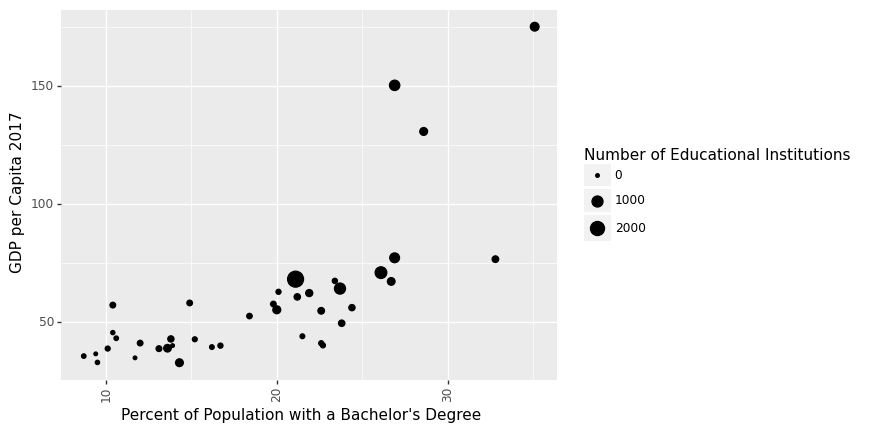

<ggplot: (8770576415735)>

In [26]:
# Create a scatterplot of the data with on the x-axis the percent of population with a Bachelor's Degree and on the y-axis the GDP per capita, the size of the bubbles is the number of educational institutions using plotnine
from plotnine import *
(ggplot(merged_gdp, aes(x='Percent of Population with a Bachelor\'s Degree', y='GDP per Capita 2017', size='Number of Educational Institutions')) + geom_point() + theme(axis_text_x=element_text(angle=90)))
